**Purpose:** \
Take on the role of an e-commerce company whose products are sold on Amazon. The goal is to provide guidance on an upcoming product launch and to monitor the health of pre-existing products.

**Specific questions to answer:** \
Product Launch: 
1. What existing products are on the market? 
    1. What is the size of the market? 
        * How much in revenue was made during 2023 for all products in the market? 
        * When are sales at the highest? 
        * Is the market over-saturated or under-saturated? (may not have this data) 
    2. Which products dominate the market? 
        * What differentiates the successful products the rest? 
        * How can we market/design our product so that we can breach the market? (do some nlp, what are customers saying about a product) 
        * How much revenue can we expect under some specific assumptions? 

Health of pre-existing products:
1. What was the size of the market for the past year? 
    1. How many products are in the market now? 
        * How many new players? 
    2. How much did we make? By quarter? 
        * How does it compare to our competitors? By quarter? 
    3. When were our sales at the highest? 
        * Are there interesting trends with compeitors? Like we sold more when they sold less indicating potential inventory shortage?
2. What are our customers saying about the product? 
    1. What is working well? 
    2. Are there specific complaints with our products? 
    3. What are people saying about our competitors? 
3. How is our product priced compared to competitors?
    1. Could we increase the price?
        * How much can we expect to make if price is moved?

**Objective:** \
Identify which company to emulate and which products to focus on

Focusing on vitamin c serums, company tbd

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3

In [5]:
categories = pd.read_csv('../data/amazon_categories.csv')
# products = pd.read_csv('../data/amazon_products.csv')

In [2]:
conn = sqlite3.connect('../data/amazon2023.db')
cur = conn.cursor()

In [16]:
query = '''
SELECT *
FROM categories
WHERE category_name LIKE 'Skin Care%'
'''
pd.read_sql(query, conn)

,id,category_name
0,49,Skin Care Products


In [35]:
query = '''
SELECT title, productURL, stars, reviews, price, boughtInLastMonth
FROM skin_care
WHERE isBestSeller=1
ORDER BY stars DESC, boughtInLastMonth DESC
'''
pd.read_sql(query, conn)

,title,productURL,stars,reviews,price,boughtInLastMonth
0,Chapstick Lip Tube (Pack of 3),https://www.amazon.com/dp/B07T7ML4ZT,4.8,0,3.79,3000
1,Neutrogena Makeup Remover Cleansing Towelette ...,https://www.amazon.com/dp/B07NGSVS8C,4.8,0,31.99,1000
2,"Vitamin C Serum - Intensive Hyaluronic Acid, P...",https://www.amazon.com/dp/B0CG5LDFFN,4.8,0,24.90,600
3,"Everyone 3-in-1 Kids Soap, Body Wash, Bubble B...",https://www.amazon.com/dp/B08167KP4C,4.7,0,22.08,5000
4,"Burt's Bees Back to School Gifts Ideas, 5 Dorm...",https://www.amazon.com/dp/B004EDWMBO,4.7,0,9.98,4000
5,"Cliganic USDA Organic Jojoba Oil, 100% Pure (2...",https://www.amazon.com/dp/B07YYFMPYW,4.7,0,8.99,4000
6,Body Glide Original Anti Chafing Stick Balm2.5...,https://www.amazon.com/dp/B0043S06GI,4.7,0,17.14,3000
7,24k Gold Under Eye Patches - 60 Pcs Eye Mask P...,https://www.amazon.com/dp/B0C1RCLD2X,4.7,0,9.99,3000
8,"DHC Deep Cleansing Oil, 4.1 Fl Oz",https://www.amazon.com/dp/B00KHO5464,4.7,0,21.00,1000
9,New York Biology Dead Sea Mud Mask for Face an...,https://www.amazon.com/dp/B09NMMXR8X,4.6,0,22.95,1000


In [41]:
query = '''
SELECT title, productURL, stars, reviews, price, isBestSeller, boughtInLastMonth
FROM skin_care
WHERE title LIKE '%vitamin c serum%'
ORDER BY boughtInLastMonth DESC, stars DESC
'''
vit_c_serums = pd.read_sql(query, conn)

In [45]:
vit_c_serums.columns

Index(['title', 'productURL', 'stars', 'reviews', 'price', 'isBestSeller',
       'boughtInLastMonth'],
      dtype='object')

In [48]:
vit_c_serums.head(3)

,title,productURL,stars,reviews,price,isBestSeller,boughtInLastMonth
0,SKIN DEVA 20% Vitamin C Serum for Face with Vi...,https://www.amazon.com/dp/B01BJCX44Q,4.3,0,19.99,0,6000
1,"Vanicream Vitamin C Serum - Free of Dyes, Frag...",https://www.amazon.com/dp/B0BJ4GZTK1,4.5,0,18.99,0,5000
2,PURA D'OR 20% Vitamin C Serum (4oz BEST VALUE)...,https://www.amazon.com/dp/B00KMCEA4S,4.4,0,14.99,0,5000


In [83]:
vit_c_serums.sort_values(by='price', ascending=False)

,title,productURL,stars,reviews,price,isBestSeller,boughtInLastMonth,revenue,revenue_tier
60,Peter Thomas Roth | Potent-C Power Serum | Bri...,https://www.amazon.com/dp/B00YP4I93C,4.4,0,89.25,0,200,17850.0,0.0
74,Shankara Anti-Age Vitamin C Serum for Face - H...,https://www.amazon.com/dp/B00175XOL4,4.4,45,74.99,0,0,0.0,0.0
14,goPure Actives Serum Trio Set - Radiant Vitami...,https://www.amazon.com/dp/B09KH97KF2,4.3,0,69.99,0,1000,69990.0,3.0
38,Youth To The People The Youth System - 6 Piece...,https://www.amazon.com/dp/B098CWGDFM,4.6,0,59.00,0,400,23600.0,1.0
29,Ursa Major Natural Vitamin C Serum | Brighteni...,https://www.amazon.com/dp/B071G1Q95T,4.5,0,56.00,0,600,33600.0,1.0
...,...,...,...,...,...,...,...,...,...
73,Cleen Beauty Vitamin C Serum for Face with Pap...,https://www.amazon.com/dp/B089YS77YF,3.9,285,6.99,0,100,699.0,0.0
66,"Travel Face Serum Set Vitamin C Serum,Hyaluron...",https://www.amazon.com/dp/B0B1WS14XH,4.0,0,3.99,0,200,798.0,0.0
20,"Mad Hippie Skin Care Set, Day & Night Dual Pac...",https://www.amazon.com/dp/B0B1PD5JY2,4.7,0,0.00,0,800,0.0,0.0
61,"YEOUTH Vitamin C Serum for Face, Anti Aging Se...",https://www.amazon.com/dp/B01A95400G,4.4,0,0.00,0,200,0.0,0.0


Text(0, 0.5, 'Count')

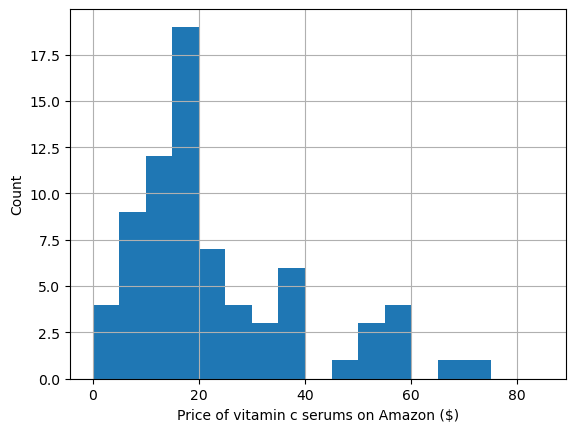

In [50]:
vit_c_serums.price.hist(bins=np.arange(0,90,5))
plt.xlabel('Price of vitamin c serums on Amazon ($)')
plt.ylabel('Count')

In [52]:
[print(i) for i in vit_c_serums['title'][:5]]

SKIN DEVA 20% Vitamin C Serum for Face with Vitamin E Plus Ferulic Acid Skincare Serum 1 fl oz 30 ML Rejuvenates Skin to Fresh & Neutralizes Free Radicals to Brighten Even Vitamin Serum
Vanicream Vitamin C Serum - Free of Dyes, Fragrance, Masking Fragrance, Lanolin, Parabens & Formaldehyde Releasers - For Sensitive Skin - 1.2 Fl Oz
PURA D'OR 20% Vitamin C Serum (4oz BEST VALUE) Lightweight Maximum Strength Formula,Hyaluronic Acid,Retinol,Professional Grade Treatment For Face & Eyes,Dark Spots,Acne,Wrinkles,For Men & Women
Mad Hippie Vitamin C Serum for Face with Hyaluronic Acid, Vitamin E & Ferulic Acid - Vitamin C Face Serum for Women/Men, Skin-Brightening Serum, 1.02 Fl Oz
Tree of Life Vitamin C Serum for Face - 1 Fl Oz Skin Care Serums - Moisturizing Vitamin E for Brightening & Smoothing Dry Skin, Anti-Aging, Wrinkles & Dark Spot, Sensitive Skin - Dermatologist-Tested


[None, None, None, None, None]

In [53]:
vit_c_serums.head(3)

,title,productURL,stars,reviews,price,isBestSeller,boughtInLastMonth
0,SKIN DEVA 20% Vitamin C Serum for Face with Vi...,https://www.amazon.com/dp/B01BJCX44Q,4.3,0,19.99,0,6000
1,"Vanicream Vitamin C Serum - Free of Dyes, Frag...",https://www.amazon.com/dp/B0BJ4GZTK1,4.5,0,18.99,0,5000
2,PURA D'OR 20% Vitamin C Serum (4oz BEST VALUE)...,https://www.amazon.com/dp/B00KMCEA4S,4.4,0,14.99,0,5000


In [54]:
vit_c_serums['revenue'] = vit_c_serums['price']*vit_c_serums['boughtInLastMonth']

Text(0, 0.5, 'Count')

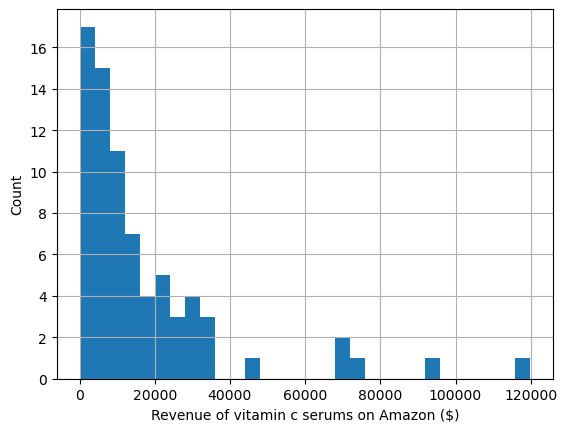

In [93]:
vit_c_serums.revenue.hist(bins=30)
plt.xlabel('Revenue of vitamin c serums on Amazon ($)')
plt.ylabel('Count')

Based on estimated monthly revenue, would classify low revenue earners as having made less than \$20,000, medium revenue earners as having made somewhere between \\$20,000-\\$40,000, and high revenue earners has having more than \\$40,000.

In [61]:
vit_c_serums['revenue_tier'] = vit_c_serums['revenue']//20000

In [81]:
vit_c_serums[vit_c_serums['revenue_tier'] == 1] 

,title,productURL,stars,reviews,price,isBestSeller,boughtInLastMonth,revenue,revenue_tier
5,DOUBLE SIZED (2 oz) PURE VITAMIN C SERUM FOR F...,https://www.amazon.com/dp/B01HC82GS6,4.5,0,14.95,0,2000,29900.0,1.0
6,Kleem Organics Pure Vitamin C Serum for Face w...,https://www.amazon.com/dp/B00KOUALMS,4.3,0,16.97,0,2000,33940.0,1.0
8,"DearKlairs Freshly Juiced Vitamin Drop, 5% Hyp...",https://www.amazon.com/dp/B010FOFSH0,4.5,0,23.00,0,1000,23000.0,1.0
11,TruSkin Face Serum Duo – Retinol Serum for Fac...,https://www.amazon.com/dp/B08DCD5MRW,4.4,0,34.99,0,1000,34990.0,1.0
12,"Super C Serum, Vibrance Vitamin C Serum for Fa...",https://www.amazon.com/dp/B0CFG5F4TV,4.4,0,22.99,0,1000,22990.0,1.0
13,"Vitamin C Serum for Face, Retinol Serum for Fa...",https://www.amazon.com/dp/B0B7J3VQ3H,4.4,0,28.49,0,1000,28490.0,1.0
18,C Serum 22 – Pure Vitamin C Serum for Face wit...,https://www.amazon.com/dp/B00JLPM8AK,4.3,0,35.00,0,900,31500.0,1.0
19,"Eight Saints Vitamin C Serum For Face, Anti Ag...",https://www.amazon.com/dp/B08Z2BJ473,4.7,0,38.00,0,800,30400.0,1.0
21,No7 Lift & Luminate Triple Action Face Serum -...,https://www.amazon.com/dp/B072S77R45,4.6,0,25.80,0,800,20640.0,1.0
22,Mario Badescu Vitamin C Serum for All Skin Typ...,https://www.amazon.com/dp/B003L8RVZ0,4.5,0,31.50,0,800,25200.0,1.0


In [72]:
vit_c_serums[vit_c_serums['productURL']=='https://www.amazon.com/dp/B07RD1RNFQ']
# vit_c_serums[vit_c_serums['productURL']=='https://www.amazon.com/dp/B00KMCEA4S']

,title,productURL,stars,reviews,price,isBestSeller,boughtInLastMonth,revenue,revenue_tier
47,PURA D'OR 25% Vitamin C Serum (4oz VALUE | SET...,https://www.amazon.com/dp/B07RD1RNFQ,4.3,232,19.99,0,300,5997.0,0.0


In [75]:
query='''
SELECT *
FROM skin_care
WHERE title LIKE "%innisfree%"
'''
pd.read_sql(query, conn)

,asin,title,imgUrl,productURL,stars,reviews,price,listPrice,category_id,isBestSeller,boughtInLastMonth
0,B08WZS1PZ9,innisfree Pore Clearing Facial Toner with Volc...,https://m.media-amazon.com/images/I/41xHmP-Kpm...,https://www.amazon.com/dp/B08WZS1PZ9,4.7,184,22.0,0.0,49,0,200
1,B0BLW85SYK,innisfree Green Tea Hydrating Micellar Cleansi...,https://m.media-amazon.com/images/I/41Fanlx3bV...,https://www.amazon.com/dp/B0BLW85SYK,4.5,53,17.0,0.0,49,0,100
2,B08WZPZDWM,innisfree Cherry Blossom Dewy Glow Toner Hydra...,https://m.media-amazon.com/images/I/312Tb3OQyw...,https://www.amazon.com/dp/B08WZPZDWM,4.6,106,20.0,0.0,49,0,100
3,B08WZS292S,innisfree Pore Clearing Facial Foam with Volca...,https://m.media-amazon.com/images/I/411Kf+GVoE...,https://www.amazon.com/dp/B08WZS292S,4.6,0,14.0,0.0,49,0,1000
4,B08WZRDXK7,innisfree Pore Clearing Clay Masks: Volcanic C...,https://m.media-amazon.com/images/I/81TJhK5mn6...,https://www.amazon.com/dp/B08WZRDXK7,4.6,0,16.0,0.0,49,0,4000
5,B08WZPZHCR,innisfree Cherry Blossom Dewy Glow Face Moistu...,https://m.media-amazon.com/images/I/611alwNC0-...,https://www.amazon.com/dp/B08WZPZHCR,4.4,0,26.0,0.0,49,0,1000
6,B0BX4NCM37,"innisfree Green Tea Balancing Toner: Soothe, H...",https://m.media-amazon.com/images/I/411sNgSpOX...,https://www.amazon.com/dp/B0BX4NCM37,4.7,0,19.0,0.0,49,0,500
7,B0BX4LDP2T,"innisfree Green Tea Balancing Cream: Soothe, H...",https://m.media-amazon.com/images/I/51q5bLCyD-...,https://www.amazon.com/dp/B0BX4LDP2T,4.5,0,22.0,0.0,49,0,400
8,B08YL7BHVQ,innisfree Cherry Blossom Dewy Glow Jam Cleanse...,https://m.media-amazon.com/images/I/61KeAJa4x6...,https://www.amazon.com/dp/B08YL7BHVQ,4.6,0,13.0,0.0,49,0,500
9,B094T4LKQ1,innisfree Clarifying Cleansing Foam with Bija ...,https://m.media-amazon.com/images/I/61r0h9xg1c...,https://www.amazon.com/dp/B094T4LKQ1,4.7,0,12.0,0.0,49,0,300


In [80]:
query='''
SELECT *, price*boughtInLastMonth AS revenue
FROM skin_care
WHERE title like "%D'OR%"
ORDER BY revenue DESC
LIMIT 100
'''
pd.read_sql(query, conn)

,asin,title,imgUrl,productURL,stars,reviews,price,listPrice,category_id,isBestSeller,boughtInLastMonth,revenue
0,B00KMCEA4S,PURA D'OR 20% Vitamin C Serum (4oz BEST VALUE)...,https://m.media-amazon.com/images/I/81sryyuzA0...,https://www.amazon.com/dp/B00KMCEA4S,4.4,0,14.99,16.99,49,0,5000,74950.0
1,B07R8WZR55,PURA D'OR Organic Sweet Almond Oil (16oz) USDA...,https://m.media-amazon.com/images/I/71KBggCajI...,https://www.amazon.com/dp/B07R8WZR55,4.6,0,12.99,15.99,49,0,4000,51960.0
2,B08BNLS6Z3,PURA D'OR Organic Sunflower Seed Oil (16oz) US...,https://m.media-amazon.com/images/I/81+DAyc1Q8...,https://www.amazon.com/dp/B08BNLS6Z3,4.7,0,15.99,0.00,49,0,1000,15990.0
3,B0C5Z69D8R,"PURA D'OR Organic Apricot Kernel Oil, 100% Pur...",https://m.media-amazon.com/images/I/81hPpR7V0B...,https://www.amazon.com/dp/B0C5Z69D8R,4.6,0,15.99,0.00,49,0,500,7995.0
4,B09NLSCL8M,PURA D'OR Awakening Body Wash (16oz) with Aloe...,https://m.media-amazon.com/images/I/71Op30VwLO...,https://www.amazon.com/dp/B09NLSCL8M,4.3,0,12.99,14.99,49,0,500,6495.0
5,B07RD1RNFQ,PURA D'OR 25% Vitamin C Serum (4oz VALUE | SET...,https://m.media-amazon.com/images/I/81TgceKFzg...,https://www.amazon.com/dp/B07RD1RNFQ,4.3,232,19.99,0.00,49,0,300,5997.0
6,B0BT5LT77M,PURA D'OR Organic Coffee Bean Oil (4oz / 118mL...,https://m.media-amazon.com/images/I/71QDM5gVXZ...,https://www.amazon.com/dp/B0BT5LT77M,4.6,26,19.99,0.00,49,0,200,3998.0


In [84]:
vit_c_serums.shape

(75, 9)

(55, 14, 6) split of low, medium, high

In [92]:
vit_c_serums[['price','revenue']].quantile([0.25, 0.5, 0.75])

,price,revenue
0.25,14.875,4307.0
0.50,19.970,9990.0
0.75,31.745,21815.0


In [91]:
vit_c_serums['revenue'].median()

9990.0